In [207]:
#Импортируем библиотеки
import networkx as nx
import matplotlib as plt
from openpyxl import load_workbook

In [208]:
#Загружаем excel книгу
wb = load_workbook('C:\\Users\\Всеволод\\Desktop\\data.xlsx')

In [209]:
#Загружаем два столбика данных
A = {}
B = {}
for i in range(261):
    A[i] = sheet.cell(row = i + 2, column = 2).value
    B[i] = sheet.cell(row = i + 2, column = 3).value

In [210]:
#Проверка
print(A[260], B[260])

Крылова Таисия Ждановна Николаев Святослав Матвеевич


In [211]:
#Делим каждое имя на список из ФИО ('ФИО' -> ['Ф','И','О'])
import numpy as np
for i in range(len(A)):
    st = A[i]
    prob = np.zeros(2)
    k = 0
    for j in range(len(st)):
        if(st[j] == ' '):
            prob[k] = j
            k += 1
    k = 0
    A[i] = [st[0:int(prob[0])], st[int(prob[0] + 1) : int(prob[1])], st[int(prob[1] + 1) : ]]

for i in range(len(B)):
    st = B[i]
    prob = np.zeros(2)
    k = 0
    for j in range(len(st)):
        if(st[j] == ' '):
            prob[k] = j
            k += 1
    k = 0
    B[i] = [st[0:int(prob[0])], st[int(prob[0] + 1) : int(prob[1])], st[int(prob[1] + 1) : ]]

In [212]:
#Проверка
print(A[0], B[0])

['Беляев', 'Владислав', 'Аркадьевич'] ['Ефимов', 'Малик', 'Константинович']


In [227]:
#Список людей, попавших в аварию больше чем один раз
#Для визуальной оценки поставленной задачи
for i in range(261):
    for j in range(261):
        if (A[i] == B[j] or (A[i] == A[j] and i != j) or (B[i] == B[j] and i != j)):
            print(A[i], i, j)

['Дорофеева', 'Гулия', 'Николаевна'] 14 77
['Дорофеева', 'Гулия', 'Николаевна'] 14 80
['Дорофеева', 'Гулия', 'Николаевна'] 14 188
['Дорофеева', 'Гулия', 'Николаевна'] 14 230
['Котова', 'Виктория', 'Архиповна'] 32 155
['Котова', 'Виктория', 'Архиповна'] 32 201
['Мухамадеев', 'Александр', 'Валерьевич'] 49 115
['Мухамадеев', 'Александр', 'Валерьевич'] 49 136
['Комин', 'Сергей', 'Николаевич'] 62 89
['Дорофеева', 'Гулия', 'Николаевна'] 77 14
['Дорофеева', 'Гулия', 'Николаевна'] 77 80
['Дорофеева', 'Гулия', 'Николаевна'] 77 188
['Дорофеева', 'Гулия', 'Николаевна'] 77 230
['Дорофеева', 'Гулия', 'Николаевна'] 80 14
['Дорофеева', 'Гулия', 'Николаевна'] 80 77
['Дорофеева', 'Гулия', 'Николаевна'] 80 188
['Дорофеева', 'Гулия', 'Николаевна'] 80 230
['Воробьев', 'Иван', 'Александрович'] 89 142
['Рогачев', 'Антон', 'Владимирович'] 115 49
['Рогачев', 'Антон', 'Владимирович'] 115 184
['Мухамадеев', 'Александр', 'Валерьевич'] 136 49
['Стрелков', 'Евгений', 'Егорович'] 141 226
['Павлова', 'Мария', 'Генна

In [216]:
#Функция, которая ищет связи с полученным на входе ФИО. Связи - это аварии и одинаковые фамилии
#Полный граф связей мы сможем получить рекурсионно путешествуя по людям
# names - список людей, которые уже являются вершинами графа связей

def find_link (name, prev_name):
    
    link_list = [] #список связей
    
    if (name not in names):
        names.append(name)
    
    for i in range(len(A)): #добавляем связи образованные по средствам аварий
        if (A[i] == name):
            link_list.append(B[i])
        if (B[i] == name):
            link_list.append(A[i])
    
    for i in range(len(link_list)): #удаляем из списка связей предыдущего человека
        if(link_list[i] == prev_name):
            link_list.pop(i)
            break;
    
    #more_links = find_papa(name) #Добавляем дополнительные связи, образованные другими способами (в данном случае, я дополнительно смотрел связи людей с одинаковыми фамилиями)
    #for i in range(len(more_links)): #Плюсуем дополнительные связи
        #link_list.append(more_links[i])
        
    link_list_2 = [] #новый список связей
    
    for i in range(len(link_list)): #Двигаемся по списку связей
        if(link_list[i] in names): #если узел уже есть в списке, то рисуем ребро графа
            G.add_edge(str(name[0])+' '+str(name[1][0:1]), str(link_list[i][0])+' '+str(link_list[i][1][0:1]))
        else:
            link_list_2.append(link_list[i]) #если нет, то добавляем в список следущих претендентов на поиск связей

    if(len(link_list_2) == 0): #если мы пришли к концу графа, то возвращаемся рекурсионно назад
        return 'END';
    else:
        for i in range(len(link_list_2)): #если нет, то рисуем связь и двигаемся по рекурсии вперёд
            G.add_edge(str(name[0])+' '+str(name[1][0:1]), str(link_list_2[i][0])+' '+str(link_list_2[i][1][0:1]))
            find_link(link_list_2[i], name)

In [215]:
#функция поиска "родственных" связей
def find_papa (name):
    papa = []
    papa_2 = []
    for i in range(len(A)): #Ищём людей с такой же фамилией
        if(name[0][0:6] == A[i][0][0:6] and name != A[i]):
            papa.append(A[i])
        if(name[0][0:6] == B[i][0][0:6] and name != B[i]):
            papa.append(B[i])
    for i in range(len(papa)):
        if(papa[i] not in papa_2):
            papa_2.append(papa[i])
    return papa_2

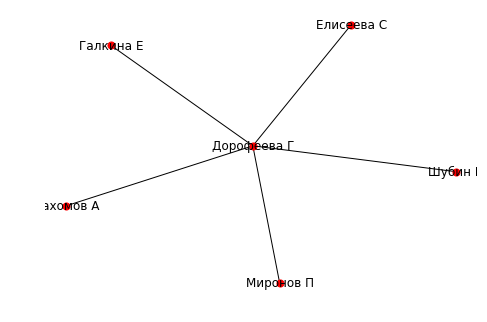

In [229]:
G=nx.Graph() #Граф
names = [] #Список имён, участвующих в графе
find_link (A[230], 0) #Запускаем функцию поиска
nx.draw(G, node_size = 50, with_labels = 1) #Рисуем граф